In [1]:
%matplotlib inline


===============================================
Creating a timeline with lines, dates, and text
===============================================

How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example,
we show how to create a simple timeline using the dates for recent releases
of Matplotlib. First, we'll pull the data from GitHub.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
from brokenaxes import brokenaxes


# Try to fetch a list of Matplotlib releases and their dates
# from https://api.github.com/repos/matplotlib/matplotlib/releases
import urllib.request
import json

content_len_date = list()
#url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
#url += '?per_page=100'
#data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())
url_data = pd.read_csv("../dataset/meta_v1_edited.csv")
dates = []
names = []
for group_num in range(7,8):
#group 3-> meth 
# Loop over all content_len within one group
#print(group_num)
    #date_list.clear()
    #content_len_list.clear()
    #content_len_date.clear()
    count = 0
    for row in url_data.itertuples():
        print(row.title)
        count += 1
        if(row.group_edited is group_num):
            edited_date = row.date[:row.date.index('+')]
            dt_object = datetime.strptime(edited_date, "%Y-%m-%d %H:%M:%S")
            content_len_date.append((dt_object, row.provider_name))
    result = sorted(content_len_date, key=lambda x: x[0])
    for i in result:
        dates.append(i[0])
        names.append(i[1])
    dates[2] = datetime.strptime("2019-09-08 06:16:00", "%Y-%m-%d %H:%M:%S")
    dates[3] = datetime.strptime("2019-09-08 18:08:27", "%Y-%m-%d %H:%M:%S")
    #dates[0] = datetime.strptime("2019-11-11 10:53:27", "%Y-%m-%d %H:%M:%S")
    #dates[1] = datetime.strptime("2019-11-11 14:53:24", "%Y-%m-%d %H:%M:%S")
    print(dates, names)
    #dates = dates[2:]
    #names = names[2:]
    #first_time = date_list[0]
    #last_time = date_list[(len(date_list)-1)]
    #duration = last_time - first_time
    #duration_in_s = duration.total_seconds()  
    #hours = divmod(duration_in_s, 3600)[0]
    


    #for item in data:
        #if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            #dates.append(item['published_at'].split("T")[0])
            #names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    #dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]



Hong Kong's fast-learning, dexterous protesters are stumped by Twitter
Utah elementary student wears Nazi costume in Halloween school parade, principal and teacher suspended
Utah elementary student wears Nazi costume in Halloween parade. The principal and teacher are now suspended.
Principal, teacher suspended after student dresses as Hitler in parade
Principal, Teacher Suspended After Student Dresses As Hitler In Halloween Parade
Naked Florida Man Accused Of Killing Suspected 'Peeping Tom'
Man arrested for killing Peeping Tom in Fort Lauderdale
Delray man arrested in 2018 'peeping Tom' killing
Man charged with manslaughter after beating peeping Tom to death
Florida man accused of beating peeping Tom to death
Man accused of killing 'peeping Tom' outside girlfriend's window
Florida man arrested for beating peeping Tom to death outside girlfriend's window
Naked Florida man arrested for beating peeping Tom to death, police say it was not in self defense
Florida peeping Tom beaten to death

Next, we'll create a `~.Axes.stem` plot with some variation in levels as to
distinguish even close-by events. In contrast to a usual stem plot, we will
shift the markers to the baseline for visual emphasis on the one-dimensional
nature of the time line.
For each event, we add a text label via `~.Axes.annotate`, which is offset
in units of points from the tip of the event line.

Note that Matplotlib will automatically plot datetime inputs.



/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


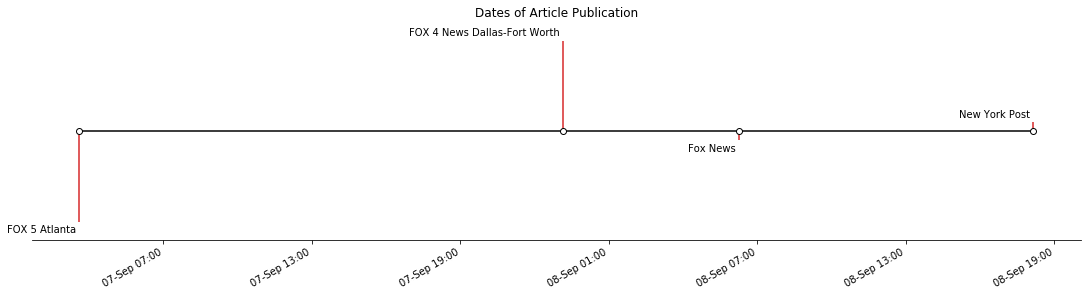

In [3]:

# Choose some nice levels
levels = np.tile([-10, 10, -1, 1, -7, 7, 3, -3, 8, -8],
                 int(np.ceil(len(dates)/6)))[:len(dates)]


# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set(title="Dates of Article Publication")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.HourLocator(interval=6))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%d-%b %H:%M"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)

plt.show()

------------

References
""""""""""

The use of the following functions, methods and classes is shown
in this example:



In [4]:
import matplotlib
matplotlib.axes.Axes.stem
matplotlib.axes.Axes.annotate
matplotlib.axis.Axis.set_major_locator
matplotlib.axis.Axis.set_major_formatter
matplotlib.dates.MonthLocator
matplotlib.dates.DateFormatter

matplotlib.dates.DateFormatter